Approximate the function $ f(x) = e^x $ by constructing the Hermite interpolation polynomial with nodes 0, 0, 1, 1.

Find the value of the interpolating polynomial for $ x = 0.5 $ and compare it to $ f(0.5) $ by finding the _**relative**_ error (by absolute value).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
f = lambda x: np.e ** x

f_der1 = lambda x: np.e ** x

In [3]:
nodes = np.array([0, 0, 1, 1])
values = np.array([f(0), f_der1(0), f(1), f_der1(1)])

n = nodes.size

In [4]:
def get_value(nodes, values, l, r):
    for i in range(0, r + 1):
        if nodes[i] == nodes[l]:
            return values[i + r - l]
    
    return None

def div_dif(nodes, values, l, r):
    if nodes[l] == nodes[r]:
        return get_value(nodes, values, l, r) / math.factorial(r - l)
    else:
        return (div_dif(nodes, values, l + 1, r) - div_dif(nodes, values, l, r - 1)) / (nodes[r] - nodes[l])

def hermite_poly(nodes, values, x):
    return sum(div_dif(nodes, values, 0, i) * (math.prod(x - nodes[j] for j in range(0, i))) for i in range(n))

In [5]:
x = 0.5

real_value = f(x)
approx_value = hermite_poly(nodes, values, x)
error = abs(real_value - approx_value) / abs(real_value)
print(f'f(x) is', real_value)
print(f'H3(f; x) is', approx_value)
print('Relative error (by absolute value) is', error)

f(x) is 1.6487212707001282
H3(f; x) is 1.6443556856721417
Relative error (by absolute value) is 0.002647861167056218


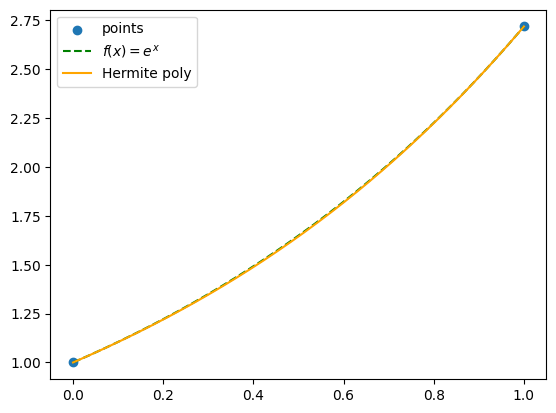

In [6]:
visual_nodes = np.array([0, 1])
visual_values = np.array([f(0), f(1)])

x_axis = np.linspace(nodes.min(), nodes.max(), 200)

plt.scatter(visual_nodes, visual_values)
plt.plot(x_axis, f(x_axis), color='green', linestyle='dashed')
plt.plot(x_axis, hermite_poly(nodes, values, x_axis), color='orange')
plt.legend(['points', '$f(x) = e^x$', 'Hermite poly'])
plt.show()